In [5]:
import pandas as pd
import numpy as np

In [22]:
flight = pd.read_csv('./Flight Price Prediction/Clean_Dataset.csv')
flight.drop(flight.columns[0], axis=1, inplace=True)
flight.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [25]:
flight.select_dtypes('number').corr()

,duration,days_left,price
duration,1.000000,-0.039157,0.204222
days_left,-0.039157,1.000000,-0.091949
price,0.204222,-0.091949,1.000000


In [27]:
flight[flight['class'] == 'Economy'].select_dtypes('number').corr()

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


In [29]:
pd.crosstab(flight['departure_time'], flight['source_city'])

source_city,Bangalore,Chennai,Delhi,Hyderabad,Kolkata,Mumbai
departure_time,,,,,,
Afternoon,5183,5807,11234,7221,7863,10486
Early_Morning,13611,9319,12248,8524,8133,14955
Evening,14243,5402,16790,5991,9594,13082
Late_Night,457,72,357,38,114,268
Morning,12323,10550,13679,9923,12065,12606
Night,6244,7550,7035,9109,8578,9499


#시각화 데이터 탐색

In [37]:
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


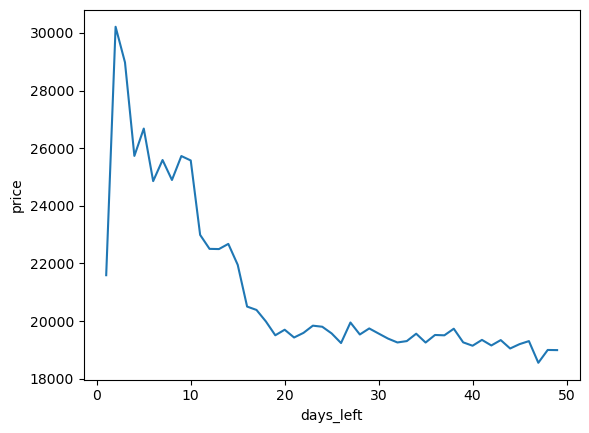

In [42]:
#1. 선 그래프 - 남은시간 x price 상관관계 시각화
df1 = flight[['duration','days_left','price']].groupby('days_left').mean()

plt.figure()
plt.plot(df1['price'])
plt.xlabel('days_left')
plt.ylabel('price')
plt.show()

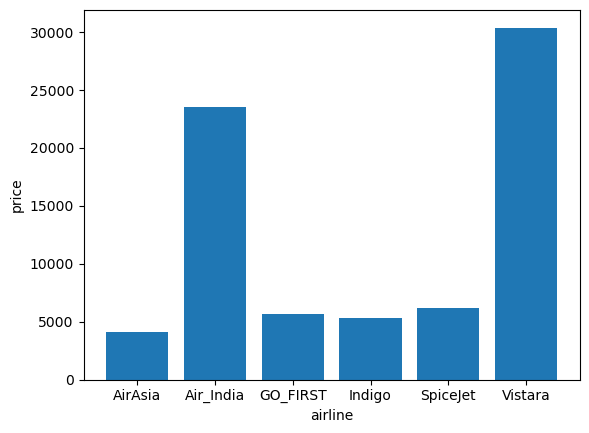

In [47]:
#2. 막대 그래프 - 
df2 = flight[['airline','duration','days_left','price']].groupby(['airline']).mean()

plt.figure()

plt.bar(df2.index, df2['price'])
plt.xlabel('airline')
plt.ylabel('price')
plt.show()

([<matplotlib.patches.Wedge at 0x2142445dbb0>,
 [Text(0.808850667687239, 0.7454935260496283, 'Morning'),
  Text(-0.6369784665329072, 0.8968045679931532, 'Early_Morning'),
  Text(-1.0011156609653635, -0.45581513069432394, 'Evening'),
  Text(0.044446529738054616, -1.0991016813717667, 'Night'),
  Text(0.9504300075501118, -0.5537894913667959, 'Afternoon'),
  Text(1.0998972327751175, -0.015035868236956592, 'Late_Night')],
 [Text(0.4411912732839485, 0.4066328323907063, '23.70 %'),
  Text(-0.34744279992704025, 0.48916612799626535, '22.25 %'),
  Text(-0.5460630877992891, -0.24862643492417666, '21.69 %'),
  Text(0.024243561675302516, -0.5995100080209635, '16.00 %'),
  Text(0.5184163677546064, -0.3020669952909796, '15.92 %'),
  Text(0.599943945150064, -0.008201382674703595, '0.44 %')])

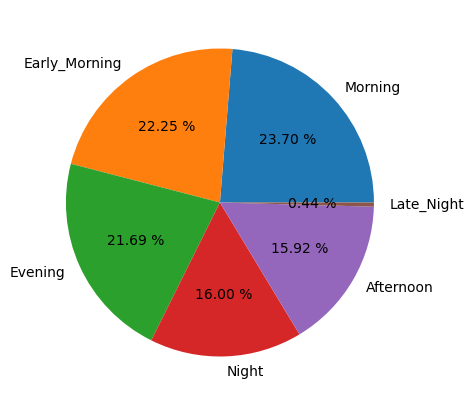

In [63]:
#파이 그래프
df3 = flight['departure_time'].value_counts()
df3

plt.figure(figsize=(5,5))
plt.pie(df3, labels = df3.index, autopct='%.2f %%')

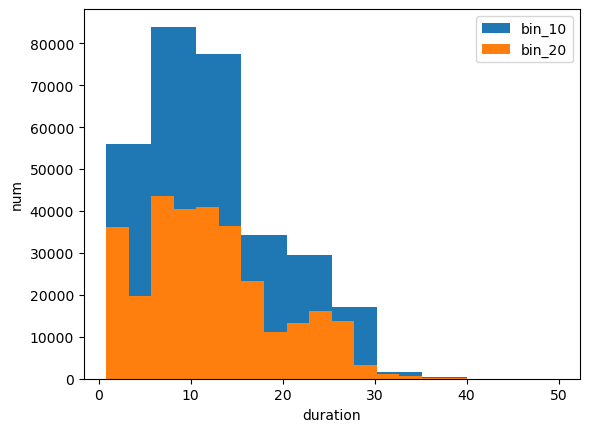

In [70]:
#히스토그램

plt.figure()
plt.hist(flight['duration'], bins = 10)
plt.hist(flight['duration'], bins = 20)
plt.xlabel('duration')
plt.ylabel('num')
plt.legend(['bin_10', 'bin_20'])
plt.show()

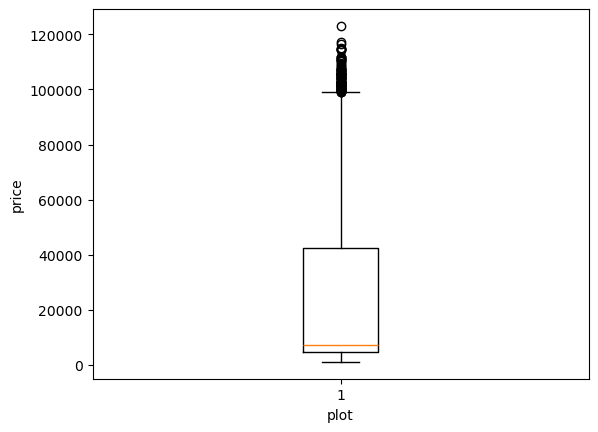

In [71]:
#상자 그래프

plt.figure()
plt.boxplot(flight['price'])
plt.xlabel('plot')
plt.ylabel('price')
plt.show()

<Axes: title={'center': 'price'}, xlabel='departure_time'>

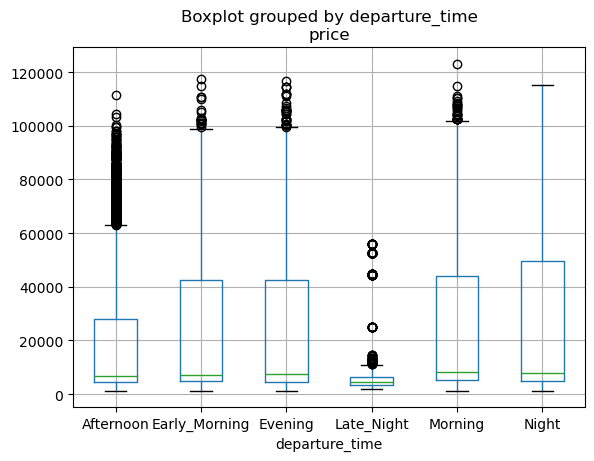

In [76]:
flight.boxplot(by = 'departure_time', column = 'price')

#다변량 시각화

In [77]:
flight.head(3)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956


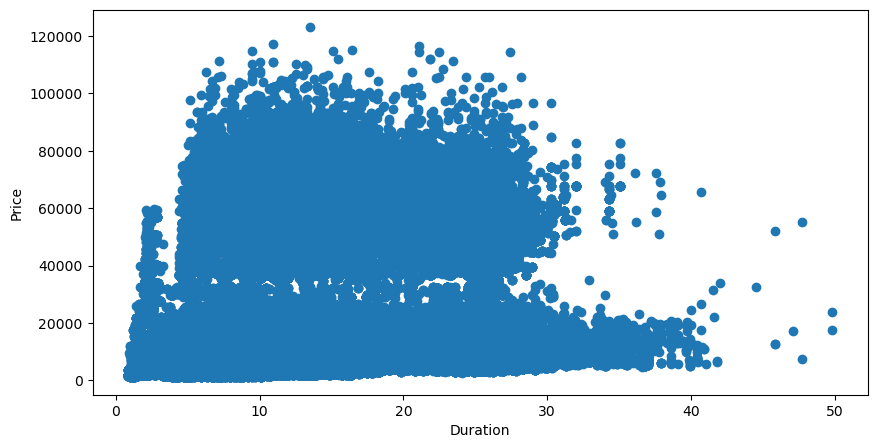

In [81]:
#scatter - 비행시간 x 가격
plt.figure(figsize=(10,5))

plt.scatter(x = flight['duration'], y = flight['price'])
plt.xlabel('Duration')
plt.ylabel('Price')
plt.show()

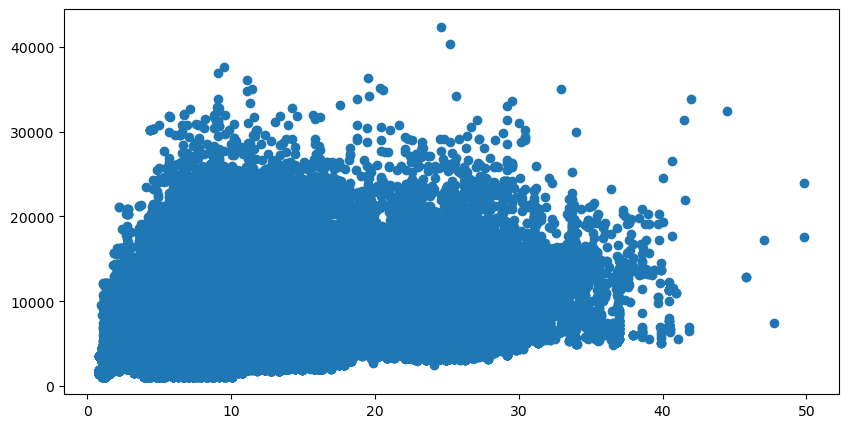

In [105]:
df4 = flight[flight['class'] == 'Economy']
plt.figure(figsize=(10,5))
plt.scatter(x = df4['duration'], y = df4['price'])
plt.show()

In [89]:
#히트맵 만들기
heat = df4.select_dtypes('number').corr()
heat

,duration,days_left,price
duration,1.000000,-0.042537,0.288379
days_left,-0.042537,1.000000,-0.559551
price,0.288379,-0.559551,1.000000


In [92]:
np.arange(0.5, len(heat.columns))

array([0.5, 1.5, 2.5])

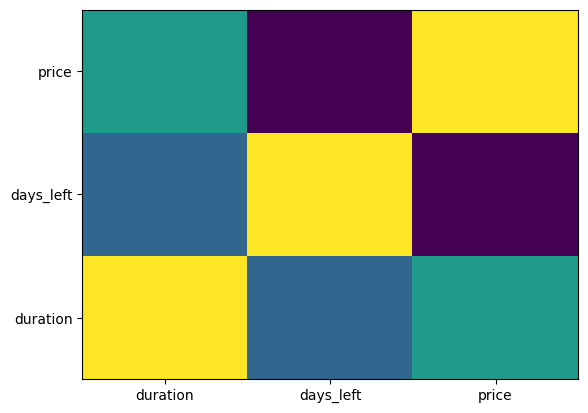

In [103]:
plt.figure()
plt.pcolor(heat)
plt.xticks(np.arange(0.5, len(heat.columns), 1), heat.columns)
plt.yticks(np.arange(0.5, len(heat.columns), 1), heat.columns)
plt.show()